# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1374 Архипов Дмитрий. Вариант №1

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
Линейная регрессия - это статистический метод анализа, который используется для изучения отношений между набором независимых переменных (X) и зависимой переменной (Y). 
Цель линейной регрессии - подобрать оптимальные значения коэффициентов $(\beta_0, \beta_1, \ldots, \beta_p)$, минимизируя сумму квадратов ошибок (SSR). Это позволяет нам создать модель, которая наилучшим образом соответствует данным и может быть использована для прогнозирования или понимания отношений между переменными.

Модель линейной регрессии представляет собой уравнение прямой:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$$

Сумма квадратов остатков (SSR): 
$$SSR = \sum_{i=1}^{n} (Y_i - (\beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip}))^2$$
$$\frac{\partial RSS}{\partial \beta_{k}} = -2\sum_{i=1}^{n}x_{ki}\left(Y_{i}- \sum_{j=1}^{m}x_{ji}\beta_{j}\right)=0, k=\overline{1,m}$$

$$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min\beta$$

Нормальные уравнения: 
$$XX^{\intercal}\beta=XY$$

Решение системы нормальных уравнений в регулярном случае: 
$$\hat{\beta}=(XX^{\intercal})^{-1}XY$$



Несмещённая оценка дисперсии:

$$ s^2 = \frac{RSS(\hat{\beta})}{n-r} $$

где r - ранг матрицы X

ДНО функции:
$$\psi=с^{\intercal}\beta$$

МНК-оценка:
$$\hat{\psi}=с^{\intercal}\beta$$

Элемент дисперсии оценки:
$$b_{\psi}=c^{\intercal}(XX^{\intercal})^{-1}c$$

Распределение:
$$\hat{\psi}\sim \mathcal{N}(\psi,\sigma^{2}b)$$

$$\frac{\hat{\psi}-\psi}{S\sqrt{b}}\sim \mathcal{S}_{n-r}$$

Доверительный эллипсойд уровня доверия $1 -\alpha$ функции параметра $\psi$:

$$ \mathrm{A}_{\alpha} = \left\{\vec{x}:(\vec{x}-\hat{\psi})^{\intercal}\mathrm{B}^{-1}(\vec{x}-\hat{\psi}) \leq \mathrm{q}\mathrm{s}^2\mathrm{x}_{\alpha}\right\} $$ 
где $\mathrm{x}_{\alpha}: \mathrm{F}_{q, n-r}(\mathrm{x}_{\alpha})=1-\alpha$

Критерий хи-квадрат:

$$\chi^2 = \sum_{i=1}^{N} \frac{(n_{i} - p_{i} n)^{2}}{n p_{i}} \sim \chi^{2}_{n-1}$$

Теорема Колмагорова:

$$D_{n} = {sup}_{X \in \mathbb R} |F_{0}(X_{i}) - F_{n}(X_{i})|$$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
$\alpha = 0.02, h = 0.9$

In [534]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

data_y = np.array([3.07, 6.53, 4.99, 4.76, 6.47, 5.13, 5.51, 4.96, 5.51, 5.21, 5.15, 6.73, 3.84, 6.04, 5.18, 4.45, 6.79,
          6.17, 5.79, 3.45, 6.24, 6.74, 5.07, 3.52, 6.55, 5.09, 3.39, 6.19, 5.85, 5.56, 4.62, 3.71, 5.43, 5.60,
         3.98, 5.44, 5.63, 4.34, 4.28, 4.12, 3.94, 4.26, 2.45, 5.07, 4.08, 5.57, 3.95, 5.72, 4.78, 5.06])
data_x = np.array([1, 1, 1, 1, 2, 3, 2, 3, 1, 2, 1, 2, 1, 2, 3, 4, 2, 1, 1, 3, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
          1, 2, 3, 2, 3, 0, 3, 4, 3, 2, 3, 2, 3, 1, 0, 1, 1, 2])
alpha, h = 0.02, 0.9

### 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной Х. Построить МНК оценки параметров сдвига Во и масштаба 31. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

Решим систему нормальных уравнений в нашем случае:
$$\hat{\beta} = \left(XX^{\intercal}\right)^{-1}XY$$

Масштаб сдвига = 5.462434456928841
Параметр сдвига = -0.2300187265917605


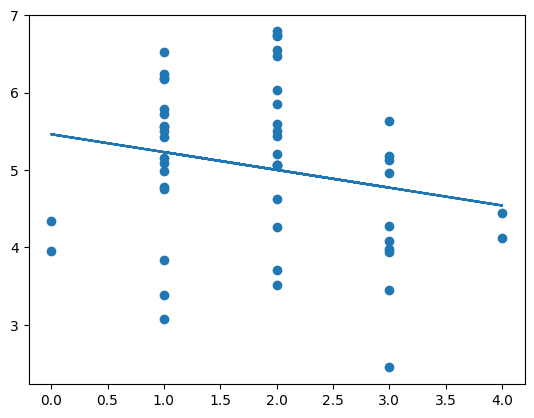

In [535]:
data_x_2nd = np.array([np.ones(50), data_x])
inv = np.linalg.inv(np.dot(data_x_2nd, data_x_2nd.T))
b_2nd = np.dot(np.dot(inv, data_x_2nd), data_y)

print(f"Масштаб сдвига = {b_2nd[0]}\nПараметр сдвига = {b_2nd[1]}")

plt.scatter(data_x, data_y)

# Добавляем линию регрессии на график
plt.plot(data_x, b_2nd[1]*data_x+b_2nd[0])

plt.show()

### 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.


$$ s^2 = \frac{RSS(\hat{\beta})}{n-r} $$

In [536]:
r = np.linalg.matrix_rank(data_x_2nd)

rss = 0
for i in range(0, len(data_y)):
    temp = data_y[i]
    for j in range(r):
        temp -= data_x_2nd[j][i]*b_2nd[j]
    rss += temp**2

disp = rss / (len(data_x) - r)
print(f"Несмещенная оценка дисперсии: {disp}")

Несмещенная оценка дисперсии: 1.0595439996878904


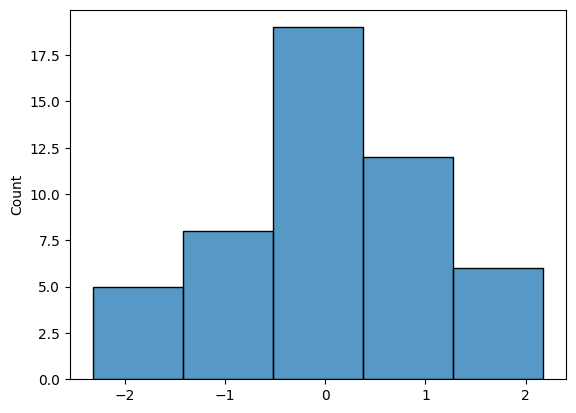

In [537]:
# Вычисляем ошибки
residuals = data_y - (b_2nd[1]*data_x + b_2nd[0])

# Построение гистограммы ошибок
sns.histplot(residuals, bins=np.arange(min(residuals), max(residuals) + h, h))
plt.show()

P-значение: 0.5751467848013135
Нет оснований отвергнуть гипотезу о нормальности ошибок

Статистика Колмогорова: 0.0829675685139935
p-значение: 0.8532166262451031
Оценка соответствует нормальному распределению.
Максимальное расстояние полученной оценки до класса нормального распределения: 0.0829675685139935


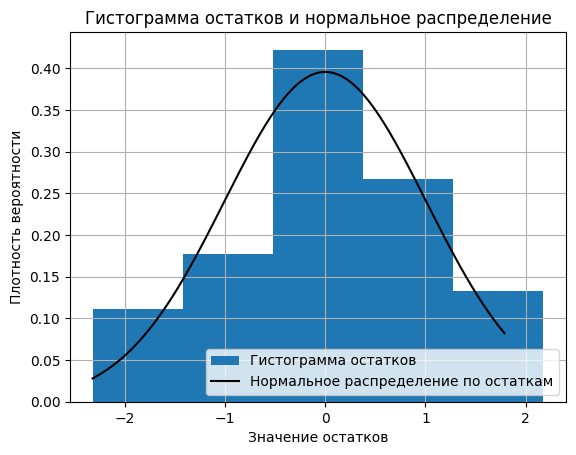

In [538]:
p_value = stats.normaltest(residuals).pvalue
print(f"P-значение: {p_value}")
if p_value < alpha:
    print("Отвергаем гипотезу о нормальности ошибок")
else:
    print("Нет оснований отвергнуть гипотезу о нормальности ошибок")

#Оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову:
ks, p_value = stats.kstest(residuals, 'norm')
print("\nСтатистика Колмогорова:", ks)
print("p-значение:", p_value)
alpha = 0.02
if p_value < alpha:
    print("Оценка не соответствует нормальному распределению.")
else:
    print("Оценка соответствует нормальному распределению.")
print(f"Максимальное расстояние полученной оценки до класса нормального распределения: {ks}")

# Гистограмма остатков
plt.hist(residuals, bins=np.arange(min(residuals), max(residuals) + h, h), density=True, label='Гистограмма остатков')

x = np.linspace(min(residuals), max(residuals), 1000)

# Вычисляем значения плотности вероятности для нормального распределения
pdf = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))

# Строим график плотности вероятности нормального распределения на основе остатков
plt.plot(x, pdf, 'k-', label='Нормальное распределение по остаткам')

plt.xlabel('Значение остатков')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма остатков и нормальное распределение')
plt.legend()
plt.grid(True)
plt.show()

### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1- \alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).

In [540]:
## Д.И. для b0
c = np.array([1 , 0])
psi = np.dot(c, b_2nd) ## МНК-оценка пси
b_psi = np.dot(np.dot(c.T, inv), c) ## элемент дисперсии оценки
print(psi, b_psi, disp**(1/2), stats.t.ppf(1 - alpha/2, len(data_x) - r))

5.462434456928841 0.09925093632958806 1.0293415369486896 2.4065812732756067


Выбираем $X_{\alpha}$: $\mathrm{S}_{50-2}(X_{\alpha})=1-\frac{\alpha}{2}=1-\frac{0.02}{2}=0.99 \to X_{0.99}=2.407$  

$\hat{\psi} = 5.462$  

$b_{\psi} = 0.099$  

$\mathrm{s} = 1.029$

Д.И - $\left[\hat{\psi} - x_{\alpha}\mathrm{s}\sqrt{b}; \hat{\psi} + x_{\alpha}\mathrm{s}\sqrt{b} \right] = \left[4.6827, 6.2413\right] \to 4.6827 \le \psi_{b_0} \le 6.2413$

In [541]:
## Д.И. для b1
c = np.array([0 , 1])
psi = np.dot(c, b_2nd) ## МНК-оценка пси
b_psi = np.dot(np.dot(c.T, inv), c) ## элемент дисперсии оценки
print(psi, b_psi, disp**(1/2), stats.t.ppf(1 - alpha/2, len(data_x) - r))

-0.2300187265917605 0.023408239700374544 1.0293415369486896 2.4065812732756067


Выбираем $X_{\alpha}$: $\mathrm{S}_{50-2}(X_{\alpha})=1-\frac{\alpha}{2}=1-\frac{0.02}{2}=0.99 \to X_{0.99}=2.407$  

$\hat{\psi} = -0.23$  

$b_{\psi} = 0.023$  

$\mathrm{s} = 1.029$

Д.И - $\left[\hat{\psi} - x_{\alpha}\mathrm{s}\sqrt{b}; \hat{\psi} + x_{\alpha}\mathrm{s}\sqrt{b} \right] = \left[-0.6056, -0.1456\right] \to -0.6056 \le \psi_{b_1} \le -0.1456$

Доверительный эллипсойд уровня доверия $1 -\alpha$ функции параметра $\psi$:

$$ \mathrm{A}_{\alpha} = \left\{\vec{x}:(\vec{x}-\hat{\psi})^{\intercal}\mathrm{B}^{-1}(\vec{x}-\hat{\psi}) \leq \mathrm{q}\mathrm{s}^2\mathrm{x}_{\alpha}\right\} $$ 
где $\mathrm{x}_{\alpha}: \mathrm{F}_{q, n-r}(\mathrm{x}_{\alpha})=1-\alpha$

Найдем крайнее значение для x:

$$ (x-\hat{\psi})^{\intercal}\mathrm{B}^{-1}(x-\hat{\psi}) = \mathrm{q}\mathrm{s}^2\mathrm{x}_{\alpha} $$

т.к матрица B будет размерностью (1, 1), то $B^{-1}=\frac1B$

$$ (x - \hat{\psi})^2 = \frac{\mathrm{q}\mathrm{s}^2\mathrm{x}_{\alpha}}{B} $$

$$ x = \sqrt{\frac{\mathrm{q}\mathrm{s}^2\mathrm{x}_{\alpha}}{B}} + \hat{\psi} $$

Это значение будет равно коэффиециенту a в уравнении эллипса.  
Коэффиециент b будет равен: 
$ \left(\sqrt{\frac{\mathrm{q}\mathrm{s}^2\mathrm{x}_{\alpha}}{B}} + \hat{\psi}\right) \cdot b_1 + b_0$

Получается следующее уравнение эллипса:
$$ \frac{\left(x - \overline{X}\right)^2}{\sqrt{\frac{\mathrm{q}\mathrm{s}^2\mathrm{x}_{\alpha}}{B}} + \hat{\psi}} + 
   \frac{\left(y - \overline{Y}\right)^2}{\left(\sqrt{\frac{\mathrm{q}\mathrm{s}^2\mathrm{x}_{\alpha}}{B}} + \hat{\psi}\right) \cdot b_1 + b_0} = 1$$

In [542]:
C = np.array([1,1])
B = 1/(np.dot(np.dot(C.T, inv), C))
psi = np.dot(C, b_2nd)
q = 2
deg = 50 - r
x_a = stats.f.ppf(1 - alpha, q, deg)

a_ = ((q*disp*x_a)/B)**(-0.5)+psi
b_ = (b_2nd[0] + b_2nd[1]*a)

print(f"q = {q}\ns² = {disp}\nxₐ = {x_a}\nB⁻¹ = {B}\nX_mean = {np.mean(data_x)}\nY_mean = {np.mean(data_y)}\na² = {a_**2}\nb² = {b_**2}")

q = 2
s² = 1.0595439996878904
xₐ = 4.248907630769176
B⁻¹ = 27.38461538461537
X_mean = 1.84
Y_mean = 5.0392
a² = 48.67002352643203
b² = 10.369062263333587


$$ \frac{(x - 1.84)^2}{48.67} + \frac{(y - 5.0392)^2}{10.369} \leq 1 $$

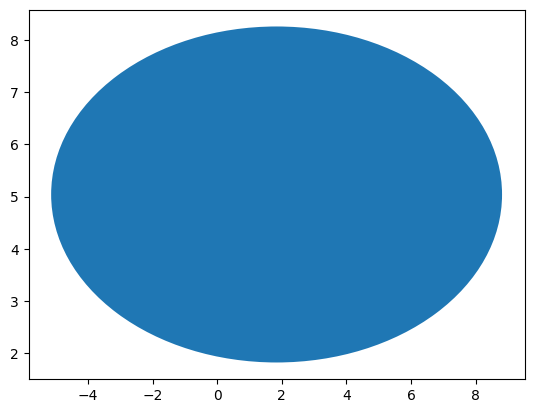

In [543]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
ellipse = Ellipse((np.mean(data_x), np.mean(data_y)), width = a_ * 2, height = b_ * 2)
ax.add_patch(ellipse)
ax.autoscale()
plt.show()

### 4. Сформулировать гипотезу независимости переменной Y от переменной Х. Провести проверку значимости.

In [544]:
from scipy.stats import f

# наивная оценка
b_naiv = np.mean(data_y)
msr = (np.sum((b_naiv - data_y)**2) - rss)/r
mse = disp

F = msr / mse  # вычисляем значение F-критерия

F_critical = f.ppf(1 - alpha, r, len(data_x) - r)  # критическое значение F-критерия
print("F-критерий",F)
print("Критическое значение F =",F_critical)
if F > F_critical:
    print("Отвергаем нулевую гипотезу. Существует значимая зависимость между Y и X.")
else:
    print("Не отвергаем нулевую гипотезу. Нет значимой зависимости между Y и X.")

F-критерий 1.0666173446534872
Критическое значение F = 4.248907630769176
Не отвергаем нулевую гипотезу. Нет значимой зависимости между Y и X.


### 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Параметры = [4.442413502109659, 1.0878185654008858, -0.3313206751054922]


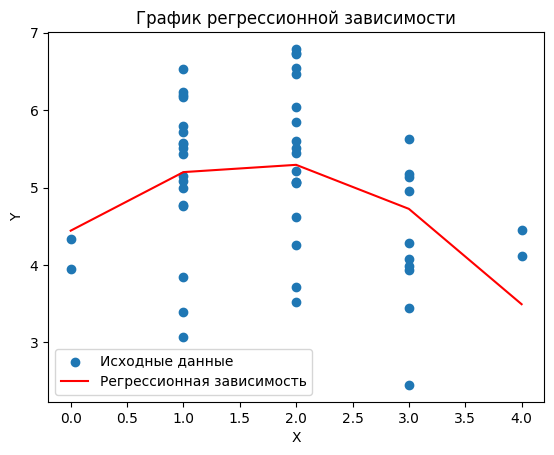

In [545]:
data_x_3nd = np.array([np.ones(50), data_x, np.square(data_x)])
inv_3nd = np.linalg.pinv(np.dot(data_x_3nd, data_x_3nd.T))
b_3nd = np.dot(np.dot(inv_3nd, data_x_3nd), data_y)

print(f"Параметры = [{b_3nd[0]}, {b_3nd[1]}, {b_3nd[2]}]")

x_range = np.array(sorted(data_x))

plt.scatter(data_x, data_y, label='Исходные данные')

plt.plot(x_range, b_3nd[0] + b_3nd[1] * x_range + b_3nd[2] * x_range**2, color='red', label='Регрессионная зависимость')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График регрессионной зависимости')
plt.legend()

plt.show()

### 6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

In [546]:
r = np.linalg.matrix_rank(data_x_3nd)

rss = 0
for i in range(0, len(data_y)):
    temp = data_y[i]
    for j in range(r):
        temp -= data_x_3nd[j][i]*b_3nd[j]
    rss += temp**2

disp = rss / (len(data_x) - r)
print(f"Несмещенная оценка дисперсии: {disp}")

Несмещенная оценка дисперсии: 0.9576968920010772


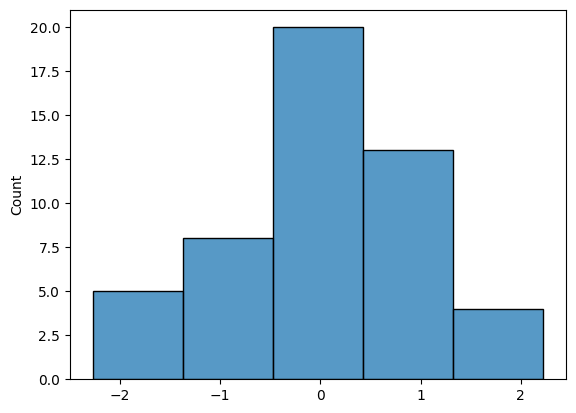

In [547]:
# Вычисляем ошибки
residuals = data_y - (b_3nd[2]*np.square(data_x) + b_3nd[1]*data_x + b_3nd[0])

# Построение гистограммы ошибок
sns.histplot(residuals, bins=np.arange(min(residuals), max(residuals) + h, h))
plt.show()

P-значение: 0.25281506874853243
Нет оснований отвергнуть гипотезу о нормальности ошибок

Статистика Колмогорова: 0.08797080758316878
p-значение: 0.8016221011441672
Оценка соответствует нормальному распределению.
Максимальное расстояние полученной оценки до класса нормального распределения: 0.08797080758316878


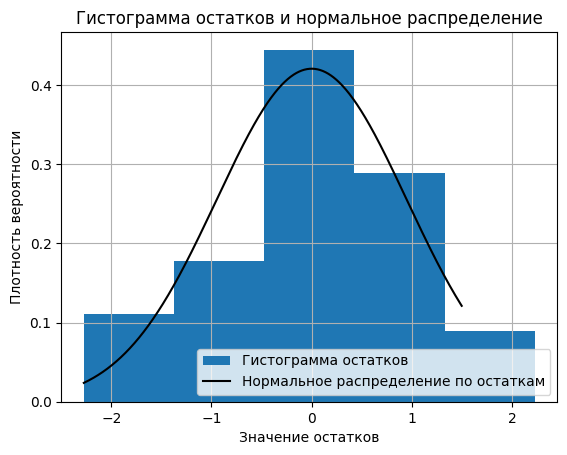

In [548]:
p_value = stats.normaltest(residuals).pvalue
print(f"P-значение: {p_value}")
if p_value < alpha:
    print("Отвергаем гипотезу о нормальности ошибок")
else:
    print("Нет оснований отвергнуть гипотезу о нормальности ошибок")

#Оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову:
ks, p_value = stats.kstest(residuals, 'norm')
print("\nСтатистика Колмогорова:", ks)
print("p-значение:", p_value)
if p_value < alpha:
    print("Оценка не соответствует нормальному распределению.")
else:
    print("Оценка соответствует нормальному распределению.")
print(f"Максимальное расстояние полученной оценки до класса нормального распределения: {ks}")

# Гистограмма остатков
plt.hist(residuals, bins=np.arange(min(residuals), max(residuals) + h, h), density=True, label='Гистограмма остатков')

x = np.linspace(min(residuals), max(residuals), 1000)

# Вычисляем значения плотности вероятности для нормального распределения
pdf = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))

# Строим график плотности вероятности нормального распределения на основе остатков
plt.plot(x, pdf, 'k-', label='Нормальное распределение по остаткам')

plt.xlabel('Значение остатков')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма остатков и нормальное распределение')
plt.legend()
plt.grid(True)
plt.show()

### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1- \alpha$.

In [549]:
## Д.И. для b0
c_b0 = np.array([1, 0, 0])
psi = np.dot(c_b0, b_3nd) ## МНК-оценка пси
b_psi = np.dot(np.dot(c_b0.T, inv_3nd), c_b0) ## элемент дисперсии оценки
print(psi, b_psi, disp**(1/2), stats.t.ppf(1 - alpha/2, len(data_x) - r))

4.442413502109659 0.27721518987341826 0.9786198914803833 2.408345050443425


Выбираем $X_{\alpha}$: $\mathrm{S}_{50-3}(X_{\alpha})=1-\frac{\alpha}{2}=1-\frac{0.02}{2}=0.99 \to X_{0.99}=2.408$  

$\hat{\psi} = 4.442$  

$b_{\psi} = 0.277$  

$\mathrm{s} = 0.979$

Д.И - $\left[\hat{\psi} - x_{\alpha}\mathrm{s}\sqrt{b}; \hat{\psi} + x_{\alpha}\mathrm{s}\sqrt{b} \right] = \left[3.2013, 5.6827\right] \to 3.2013 \le \psi_{b_0} \le 5.6827$

In [550]:
## Д.И. для b1
c_b1 = np.array([0, 1, 0])
psi = np.dot(c_b1, b_3nd) ## МНК-оценка пси
b_psi = np.dot(np.dot(c_b1.T, inv_3nd), c_b1) ## элемент дисперсии оценки
print(psi, b_psi, disp**(1/2), stats.t.ppf(1 - alpha/2, len(data_x) - r))

1.0878185654008858 0.32046413502109783 0.9786198914803833 2.408345050443425


Выбираем $X_{\alpha}$: $\mathrm{S}_{50-3}(X_{\alpha})=1-\frac{\alpha}{2}=1-\frac{0.02}{2}=0.99 \to X_{0.99}=2.408$  

$\hat{\psi} = 1.088$  

$b_{\psi} = 0.32$  

$\mathrm{s} = 0.979$

Д.И - $\left[\hat{\psi} - x_{\alpha}\mathrm{s}\sqrt{b}; \hat{\psi} + x_{\alpha}\mathrm{s}\sqrt{b} \right] = \left[-0.2456, 2.4216\right] \to -0.2456 \le \psi_{b_1} \le 2.4216$

In [551]:
## Д.И. для b2
c_b2 = np.array([0, 0, 1])
psi = np.dot(c_b2, b_3nd) ## МНК-оценка пси
b_psi = np.dot(np.dot(c_b2.T, inv_3nd), c_b2) ## элемент дисперсии оценки
print(psi, b_psi, disp**(1/2), stats.t.ppf(1 - alpha/2, len(data_x) - r))

-0.3313206751054922 0.018776371308016928 0.9786198914803833 2.408345050443425


Выбираем $X_{\alpha}$: $\mathrm{S}_{50-3}(X_{\alpha})=1-\frac{\alpha}{2}=1-\frac{0.02}{2}=0.99 \to X_{0.99}=2.408$  

$\hat{\psi} = 0.331$  

$b_{\psi} = 0.188$  

$\mathrm{s} = 0.979$

Д.И - $\left[\hat{\psi} - x_{\alpha}\mathrm{s}\sqrt{b}; \hat{\psi} + x_{\alpha}\mathrm{s}\sqrt{b} \right] = \left[-0.6912, 1.3532\right] \to -0.6912 \le \psi_{b_2} \le 1.3532$

In [552]:
C = np.array([1, 1, 1])
B = 1/(np.dot(np.dot(C.T, inv_3nd), C))
psi = np.dot(C, b_3nd)
q = 3
deg = 50 - r
x_a = stats.f.ppf(1 - alpha, q, deg)

a_ = ((q*disp*x_a)/B)**(-0.5)+psi
b_ = (b_3nd[0] + b_3nd[1]*a_ + b_3nd[2]*a_**2)

print(f"q = {q}\ns² = {disp}\nxₐ = {x_a}\nB⁻¹ = {B}\nX_mean = {np.mean(data_x)}\nY_mean = {np.mean(data_y)}\na² = {a_**2}\nb² = {b_**2}")

q = 3
s² = 0.9576968920010772
xₐ = 3.6061455215960643
B⁻¹ = 27.24137931034487
X_mean = 1.84
Y_mean = 5.0392
a² = 46.518077935652045
b² = 12.606845962739204


$$ \frac{(x - 1.84)^2}{46.518} + \frac{(y - 5.0392)^2}{12.607} \leq 1 $$

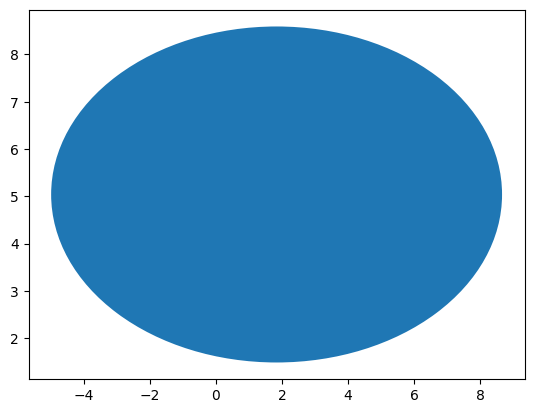

In [553]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
ellipse = Ellipse((np.mean(data_x), np.mean(data_y)), width = a_ * 2, height = b_ * 2)
ax.add_patch(ellipse)
ax.autoscale()
plt.show()

### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной Х и проверить её значимость на уровне $\alpha$.

In [554]:
# наивная оценка
b_naiv = np.mean(data_y)
msr = (np.sum((b_naiv - data_y)**2) - rss)/r
mse = disp

F = msr / mse  # вычисляем значение F-критерия

F_critical = f.ppf(1 - alpha, r, len(data_x) - r)  # критическое значение F-критерия
print("F-критерий",F)
print("Критическое значение F =",F_critical)
if F > F_critical:
    print("Отвергаем нулевую гипотезу. Существует значимая зависимость между Y и X.")
else:
    print("Не отвергаем нулевую гипотезу. Нет значимой зависимости между Y и X.")

F-критерий 2.8215656900973687
Критическое значение F = 3.6061455215960643
Не отвергаем нулевую гипотезу. Нет значимой зависимости между Y и X.


## Выводы

Построена модель линейной регрессии переменной Y от переменной X. Используя метод наименьших квадратов (МНК), были получены оценки параметров сдвига и масштаба. Построена линия регрессии, которая демонстрирует характер зависимости между переменными. Визуальное соответствие данных и построенной оценки позволяет сделать вывод об отсутствии линейной зависимости между ними.  
Построена несмещённая оценка дисперсии и проверена гипотеза о нормальности ошибок на уровне значимости хи-квадрат. Оценено расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуальное оценивание данных также подтверждает предположение о нормальности ошибок.  
Построены доверительные интервалы для параметров с уровнем доверия 1 - α. Также построен доверительный эллипс уровня доверия 1 - α для выбранных параметров.  
Сформулирована и проведена проверка гипотезы о независимости переменной Y от переменной X на соответствующем уровне значимости.
Предложена и исследована модель, включающая дополнительный член с $X^2$. Были получены МНК оценки параметров в данной модели и изображена регрессионная зависимость.  